---
**Chapter 07**
# **Working with Keras: A deep dive**
---

In [59]:
# System Libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

# User Libraries
from modules import Chapter_01
from modules import Common

# Reload Libraries
importlib.reload(Chapter_01)
importlib.reload(Common)

<module 'modules.Common' from '/Users/siddiqui/Projects/concepts/concepts-ai/notebooks/../modules/Common.py'>

---
# **Graphviz**
---

| Step |Detail |
| --- | ---|
| Step 01 | pip install pydot |
| Step 02 (Linux) | sudo apt install graphviz |
| Step 02 (Mac)   | brew install graphviz |
| Step 03 (Linux) | pip install pygraphviz |
| Step 03 (Mac) | [pygraphviz on M2 Mac](https://github.com/pygraphviz/pygraphviz/issues/398#issuecomment-1516213484) |


---
# **Model Pattern — Keras.Sequential**
---

### <ins />**1. Single Input/Output**

**Using build**

In [ ]:
model = keras.Sequential(name="example_sequential_api_1")
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid))
model.build(input_shape=(None, 3))  # N batches, 3 features
model.summary()

**Using Input**

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=((3,)), name="I_Input"))
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature"))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid, name="O_Output"))
model.summary()
keras.utils.plot_model(model, "../resources/tmp/single_io_model_sequential.png", show_shapes=True)

**Difference between layer and model**

Model has fit / evaluate / predict / save methods

### <ins />**2. Multi Input/Output**

> Sequential API works only with single input/output

---
# **Model Pattern — Keras.Model**
---

### <ins />**1. Single Input/Output**

In [ ]:
inputs = keras.layers.Input(shape=((3,)), name="I_Input")
features = keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature")(inputs)
outputs = keras.layers.Dense(units=1, activation=tf.nn.sigmoid, name="O_Output")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
keras.utils.plot_model(model, "../resources/tmp/single_io_model_functional.png", show_shapes=True)

### <ins />**2. Dataset**

**Description:**
- Customer ticket management system

**Input:**
- Title of ticket
- Text of ticket
- Tag of ticket

**Output:**
- Priority of ticket
- Department of ticket
- Difficulty of ticket

In [ ]:
# ------------------------------
# Shapes
# ------------------------------
num_samples = 1280
num_words = 1000
num_tags = 10
num_priorities = 1
num_departments = 4
num_difficulties = 3
# ------------------------------
# Inputs
# ------------------------------
I_title = np.random.randint(low=0, high=2, size=(num_samples, num_words))
I_text = np.random.randint(low=0, high=2, size=(num_samples, num_words))
I_tag = np.random.randint(low=0, high=2, size=(num_samples, num_tags))
# ------------------------------
# Outputs
# ------------------------------
O_priority = np.random.random(size=(num_samples, num_priorities))
O_department = np.random.randint(low=0, high=2, size=(num_samples, num_departments))
O_difficulty = np.random.randint(low=0, high=2, size=(num_samples, num_difficulties))

### <ins />**3. Model Layers**

In [ ]:
# ------------------------------
# Inputs
# ------------------------------
L_title = keras.layers.Input(shape=(num_words,), name="I_title")
L_text = keras.layers.Input(shape=(num_words,), name="I_text")
L_tag = keras.layers.Input(shape=(num_tags,), name="I_tag")
inputs = keras.layers.Concatenate(name="Mixing")([L_title, L_text, L_tag])
# ------------------------------
# Features
# ------------------------------
features = keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature")(inputs)
# ------------------------------
# Outputs
# ------------------------------
L_priority = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid, name="O_priority")(features)
L_department = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax, name="O_department")(features)

### <ins />**4. Model Creation**

In [ ]:
model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department])

### <ins />**5. Model Summary**

In [ ]:
model.summary()

### <ins />**7. Model Graph**

In [ ]:
keras.utils.plot_model(model, "../resources/tmp/multi_io_model_functional.png", show_shapes=True)

### <ins />**8. Model Feature Extraction**

**Problem:**
- Add a new output in the model
- Do not change original model

**Solution:**
- Extract features from existing model
- Create new model using extracted features

In [ ]:
# ------------------------------
# Features
# ------------------------------
features = model.layers[4].output
L_difficulty = keras.layers.Dense(units=num_difficulties, activation=tf.nn.softmax, name="O_difficulty")(features)
full_model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department, L_difficulty])
full_model.summary()
keras.utils.plot_model(full_model, "../resources/tmp/multi_io_model_functional.png", show_shapes=True)

### <ins />**9. Model Configuration**

In [ ]:
# ------------------------------
# Array notation can also be used
# ------------------------------
full_model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss={
        "O_priority": keras.losses.MeanSquaredError(),
        "O_department": keras.losses.CategoricalCrossentropy(),
        "O_difficulty": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "O_priority": keras.metrics.MeanAbsoluteError(),
        "O_department": keras.metrics.CategoricalAccuracy(),
        "O_difficulty": keras.metrics.CategoricalAccuracy(),
    },
)

### <ins />**10. Model Training**

In [ ]:
epochs = 1
history = full_model.fit(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    y={
        "O_priority": O_priority,
        "O_department": O_department,
        "O_difficulty": O_difficulty,
    },
    epochs=epochs,
    verbose=False,
)

### <ins />**11. Model Evaluation**

In [ ]:
full_model.evaluate(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    y={
        "O_priority": O_priority,
        "O_department": O_department,
        "O_difficulty": O_difficulty,
    },
    verbose=False,
)

### <ins />**12. Model Prediction**

In [ ]:
P_priority, P_department, P_difficulty = full_model.predict(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    verbose=False,
)

---
# **Model Pattern — Subclass Keras.Model**
---

### <ins />**1. Model Subclass**

In [ ]:
class MyClass(keras.Model):
    # ------------------------------
    # Define Layers
    # ------------------------------
    def __init__(self):
        super().__init__()
        self.concat_layer = keras.layers.Concatenate()
        self.mixing_layer = keras.layers.Dense(units=64, activation=tf.nn.relu)
        self.priority_scorer = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid)
        self.department_classifier = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax)

    # ------------------------------
    # Define Forward Pass (Prediction)
    # ------------------------------
    def call(self, inputs):
        title, text, tag = inputs
        features = self.concat_layer([title, text, tag])
        features = self.mixing_layer(features)
        P_priority = self.priority_scorer(features)
        P_department = self.department_classifier(features)
        return P_priority, P_department

### <ins />**2. Model Creation**

In [ ]:
subclass_model = MyClass()

### <ins />**3. Model Configuration**

In [ ]:
subclass_model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
    metrics=[keras.metrics.MeanAbsoluteError(), keras.metrics.CategoricalAccuracy()],
)

### <ins />**4. Model Training**

In [ ]:
epochs = 1
history = subclass_model.fit(
    x=[I_title, I_text, I_tag],
    y=[O_priority, O_department],
    epochs=epochs,
    verbose=False,
)

### <ins />**5. Model Evaluation**

In [ ]:
subclass_model.evaluate(
    x=[I_title, I_text, I_tag],
    y=[O_priority, O_department],
    verbose=False,
)

### <ins />**6. Model Prediction**

In [ ]:
subclass_model.predict([I_title, I_text, I_tag])

### <ins />**7. Model Summary**

In [ ]:
subclass_model.summary()

### <ins />**8. Model Graph**

In [ ]:
keras.utils.plot_model(subclass_model, "../resources/tmp/multi_io_model_subclass.png", show_shapes=True)

### <ins />**9. Disadvantages**

- Summary does not work completely
- Graph (plot_model) does not work
- Forward pass is a black box
- More boilerplate code required
- Bigger error surface area
- More debugging required


---
# **Mixing Module Patterns**
---

### <ins />**1. Functional model including Subclass model**

### <ins />**2. Subclass model including Functional model**

### <ins />**3. Conclusion**

- Subclass layers with functional model provides development flexibility and simplicity

---
# **Builtin training and evaluation loops**
---

### <ins />**1. Mnist using Functional model**

In [29]:
(x_train, y_train), (x_test, y_test) = Chapter_01.prepare()
model = Chapter_01.get_function_model()
history = Chapter_01.train(x=x_train, y=y_train, epoch=2, model=model)
Chapter_01.evaluate(x=x_test, y=y_test, model=model, silent=True)
Chapter_01.predict(x=x_test, y=y_test, model=model, silent=True)


Ground:  7
Prediction:  7
Confidence:  0.9999745

Ground:  2
Prediction:  2
Confidence:  0.99999547

Ground:  1
Prediction:  1
Confidence:  0.99740535

Ground:  0
Prediction:  0
Confidence:  0.9997292

Ground:  4
Prediction:  4
Confidence:  0.9616187


### <ins />**2. Custom Metrics**

- Measure performance of model on train dataset versus test dataset
- keras.metrics **does not** update its variables in backpropagation
- The following are the methods for custom metrics:
  - update_state()
  - results()
  - reset_state()
- Note: keras.layers update its variables in backpropagation unlike keras.metrics

In [46]:
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        # Metric Constructor
        super().__init__(name=name, **kwargs)
        # Create Weights
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.num_samples = self.add_weight(name="num_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # y_true and y_pred are labels of a batch
        # y_true must be a probability distribution
        # Total number of labels in the batch
        num_labels = tf.shape(y_pred)[1]
        y_true = tf.one_hot(y_true, depth=num_labels)
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        # Total number of samples in a batch
        num_samples = tf.shape(y_pred)[0]
        # Update weights
        self.mse_sum.assign_add(mse)
        self.num_samples.assign_add(num_samples)

    def result(self):
        # Root mean square averaged across all samples in a batch
        return tf.sqrt(self.mse_sum / tf.cast(self.num_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.0)
        self.num_samples.assign(0)

In [54]:
metrics = metrics = [keras.metrics.SparseCategoricalAccuracy(), RootMeanSquaredError()]
model = Chapter_01.get_function_model(metrics)
history = Chapter_01.train(x=x_train, y=y_train, epoch=2, model=model)
test_loss, test_acc, test_rmse = model.evaluate(x=x_test, y=y_test, verbose=False)
print("Root Mean Squared Error: ", test_rmse)
print("Crossentropy: ", test_loss)
print("Accuracy: ", test_acc)

Root Mean Squared Error:  0.07317489385604858
Crossentropy:  0.1027441918849945
Accuracy:  0.970300018787384


### <ins />**3. Builtin Callbacks**

**Common Callbacks**
  1. LearningRateScheduler
  2. ReduceLROnPlateau
  3. ModelCheckpoint
  4. EarlyStopping
  5. CSVLogger

In [62]:
callbacks = [
    # Stop training once metric stops improving for n epochs
    keras.callbacks.EarlyStopping(
        monitor="val_sparse_categorical_accuracy",
        patience=2,  # how many epoch
    ),
    # Save model when metric improves
    keras.callbacks.ModelCheckpoint(
        filepath="../resources/models/tmp/checkpoint.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
]

**EarlyStopping + ModelCheckpoint**

Metrics: 
loss, sparse_categorical_accuracy, val_loss, val_sparse_categorical_accuracy, 


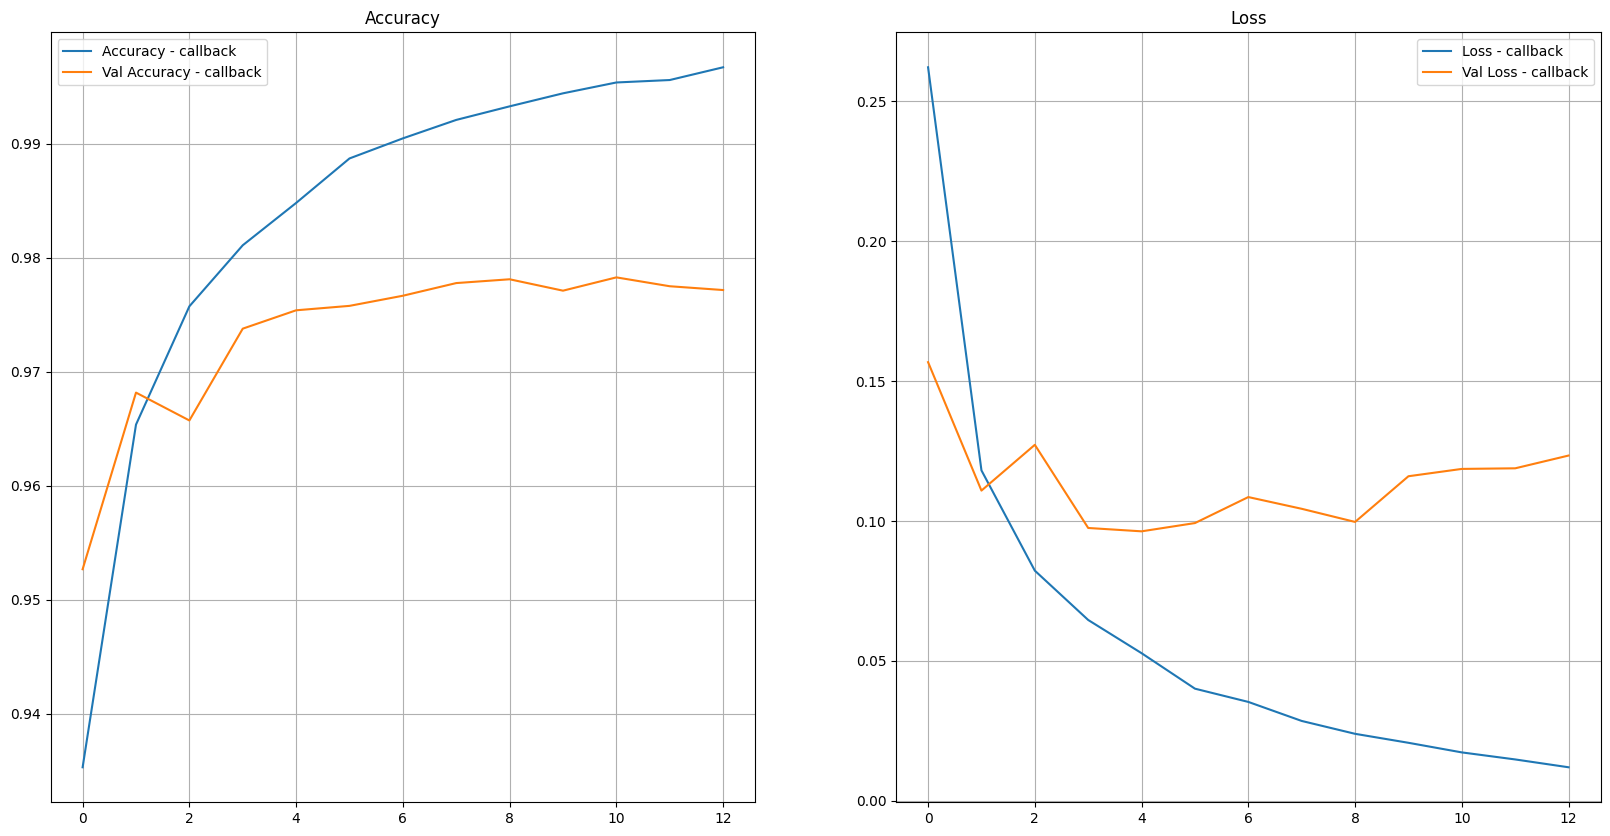

In [66]:
model = Chapter_01.get_function_model()
history = Chapter_01.train(x=x_train, y=y_train, epoch=100, model=model, callbacks=callbacks)
Chapter_01.evaluate(x=x_test, y=y_test, model=model, silent=True)
Chapter_01.predict(x=x_test, y=y_test, model=model, silent=True)
Common.plot(data=[history], labels=["callback"])

### <ins />**4. Save and Load model**

In [77]:
filepath = "../resources/models/tmp/model.keras"
model.save(filepath)
keras.models.load_model(filepath)

### <ins />**4. Custom Callbacks**

**Callback Events**

| Event | Output |
| --- | ---|
| on_batch_start |  batch, logs |
| on_batch_end |  batch, logs |
| on_epoch_start |  epoch, logs |
| on_epoch_end |  epoch, logs |
| on_train_start | logs |
| on_train_end | logs |  
   